## All electron calculation for carbon, LDA.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# add pstudio to the search path
import sys
sys.path.append('..')

In [2]:
from pstudio import AE, set_output
set_output(sys.stdout)

ae = AE('C', xcname='LDA', relativity='SR')
ae.run()


scalar relativistic atomic calculation for C (Carbon, Z=6)
configuration: 1s2 2s2 2p2, 6 electrons
exchange-correlation: lda_x+lda_c_pz
2001 radial gridpoints in [1e-05,100]

Converged in 63 iterations

Energy contributions:
------------------------------------------------------------------------
Kinetic:      +37.269733 Ha     +1014.161102 eV 
Ionic:        -87.619337 Ha     -2384.243613 eV 
Hartree:      +17.627276 Ha      +479.662609 eV 
XC:            -4.732032 Ha      -128.765157 eV 
------------------------------------------------------------------------
Total:        -37.454308 Ha     -1019.183627 eV 

state      eigenvalue      eigenvalue        rmax
------------------------------------------------------------------------
1s2         -9.961701 Ha  -271.071678 eV    0.175
2s2         -0.501784 Ha   -13.654238 eV    1.218
2p2         -0.199279 Ha    -5.422666 eV    1.189



In [38]:
# load LD1 results
ld1ae = np.loadtxt('LD1_C-LDA-TM/c.wfc')
ld1rho = np.loadtxt('LD1_C-LDA-TM/rho.dat')

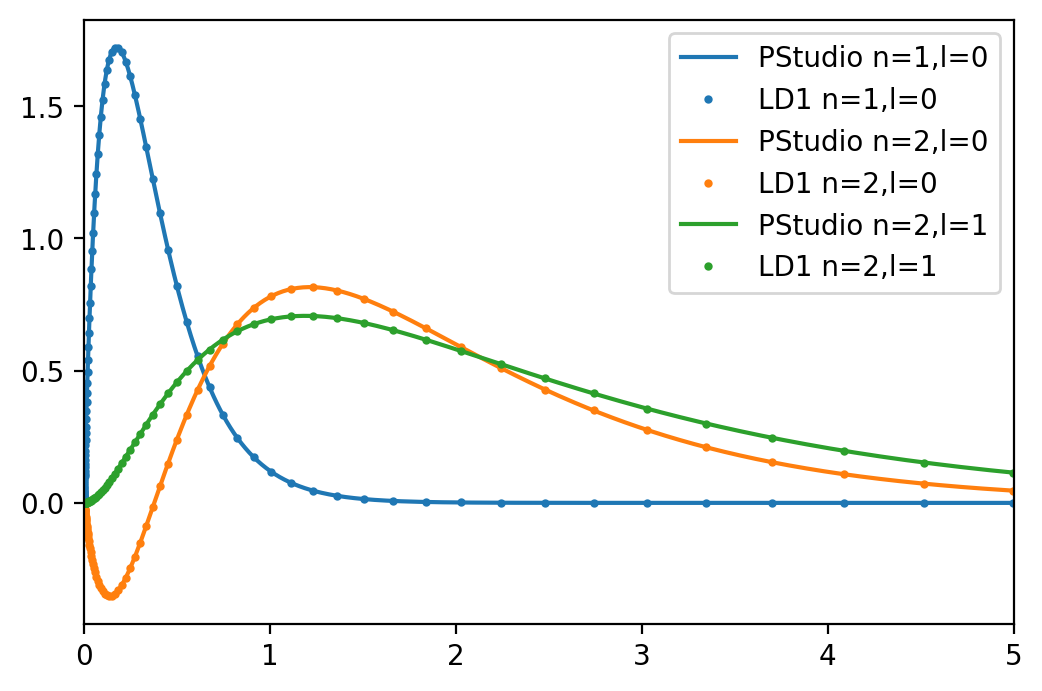

In [39]:
# loop over the valence orbitals
r = ae.rgd.r
plt.figure(figsize=(6,4), dpi=200)

for i, orb in enumerate(ae.orbitals):
    n = orb.n
    l = orb.l
    aeorb = orb.ur
    
    nl = 'n={0},l={1}'.format(n,l)
    color = 'C{0}'.format(i)
    plt.plot(r, aeorb, color=color, label='PStudio '+nl)
    if i == 0:
        cc, sign = 3, 1.0
    if i == 1:
        cc, sign = 2, -1.0
    if i == 2:
        cc, sign = 1, 1.0
    plt.plot(ld1ae[::20,0], sign*ld1ae[::20,cc], linestyle='none', color=color, marker='o', markersize=2, label='LD1 '+nl)
    
plt.xlim(0,5)
plt.legend()
plt.show()

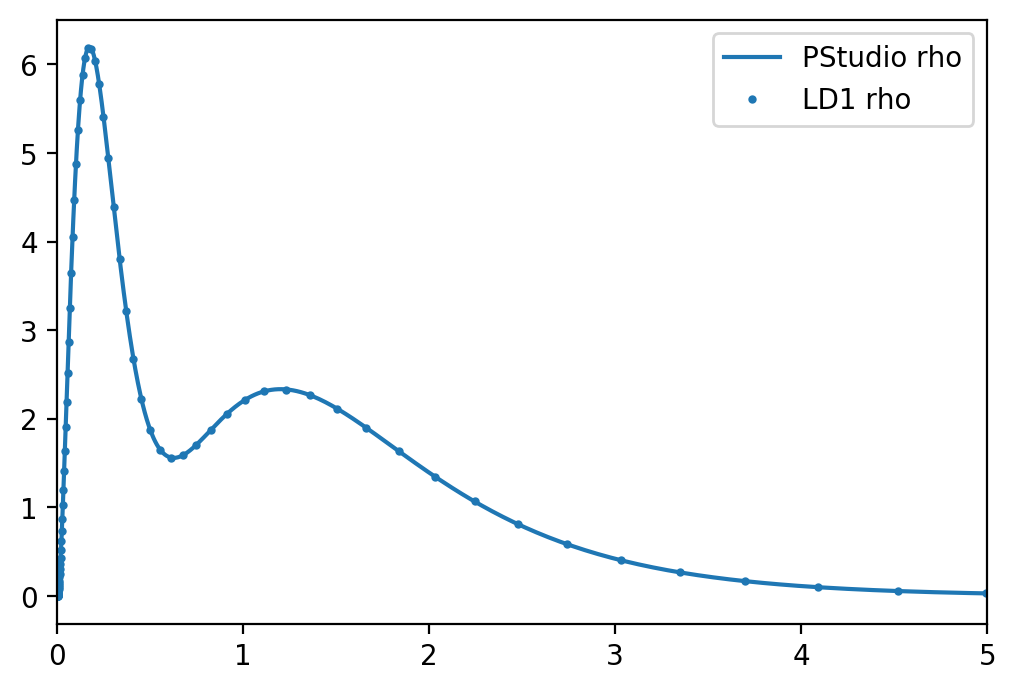

In [40]:
# charge density
r = ae.rgd.r
plt.figure(figsize=(6,4), dpi=200)
plt.plot(r, ae.n*r*r*(4*pi), color='C0', label='PStudio rho')
plt.plot(ld1rho[::20,0], ld1rho[::20,1], linestyle='none', color='C0', marker='o', markersize=2, label='LD1 rho')
plt.xlim(0,5)
plt.legend()
plt.show()



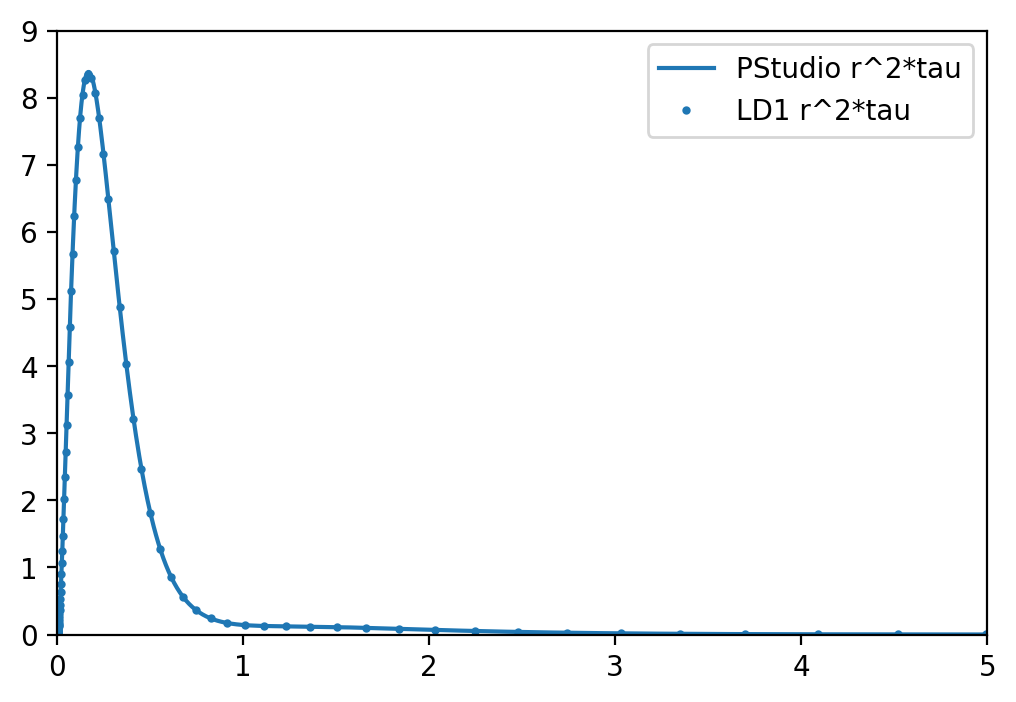

In [54]:
# tau
ae.calculate_tau()
plt.figure(figsize=(6,4), dpi=200)
plt.plot(r, ae.tau*r*r, color='C0', label='PStudio r^2*tau')
plt.plot(ld1rho[::20,0], ld1rho[::20,2]*ld1rho[::20,0]**2, linestyle='none', color='C0', marker='o', markersize=2, label='LD1 r^2*tau')
plt.xlim(0,5)
plt.ylim(0,9)
plt.legend()
plt.show()

/home/ceresoli/Programs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/ceresoli/Programs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


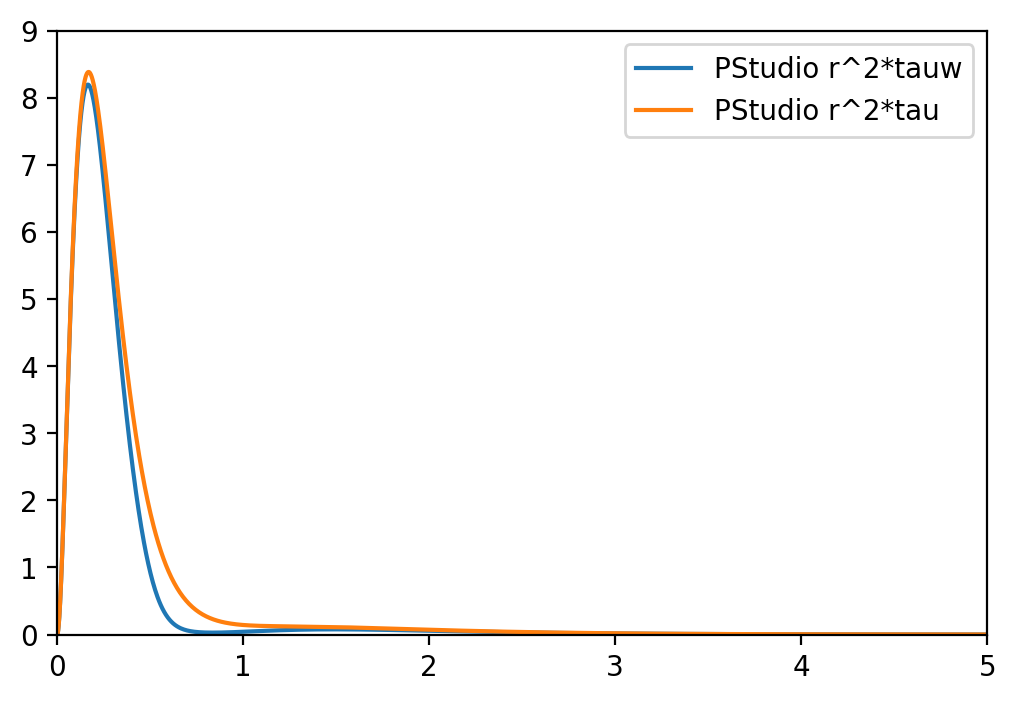

In [56]:
# tauw
tauw = (1.0/8.0) * ae.rgd.deriv1(ae.n)**2 / ae.n
plt.figure(figsize=(6,4), dpi=200)
plt.plot(r, tauw*r*r, label='PStudio r^2*tauw')
plt.plot(r, ae.tau*r*r, label='PStudio r^2*tau')
plt.xlim(0,5)
plt.ylim(0,9)
plt.legend()
plt.show()


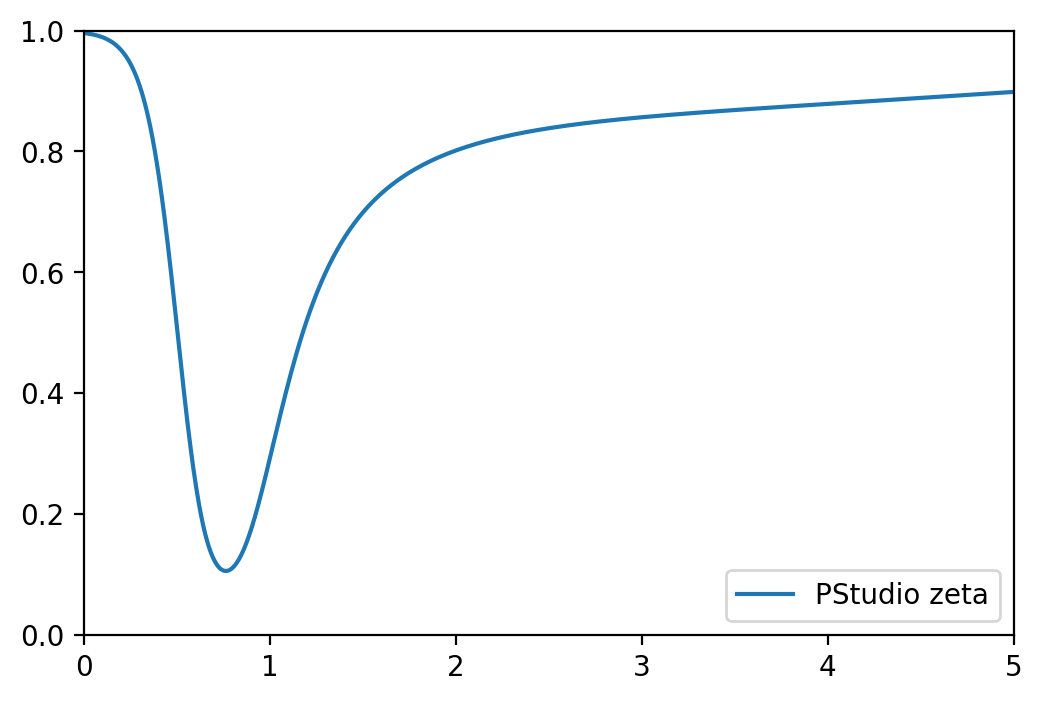

In [59]:
# zeta (must be <1)
zeta = tauw/ae.tau
plt.figure(figsize=(6,4), dpi=200)
plt.plot(r, zeta, label='PStudio zeta')
plt.xlim(0,5)
plt.ylim(0,1)
plt.legend()
plt.show()

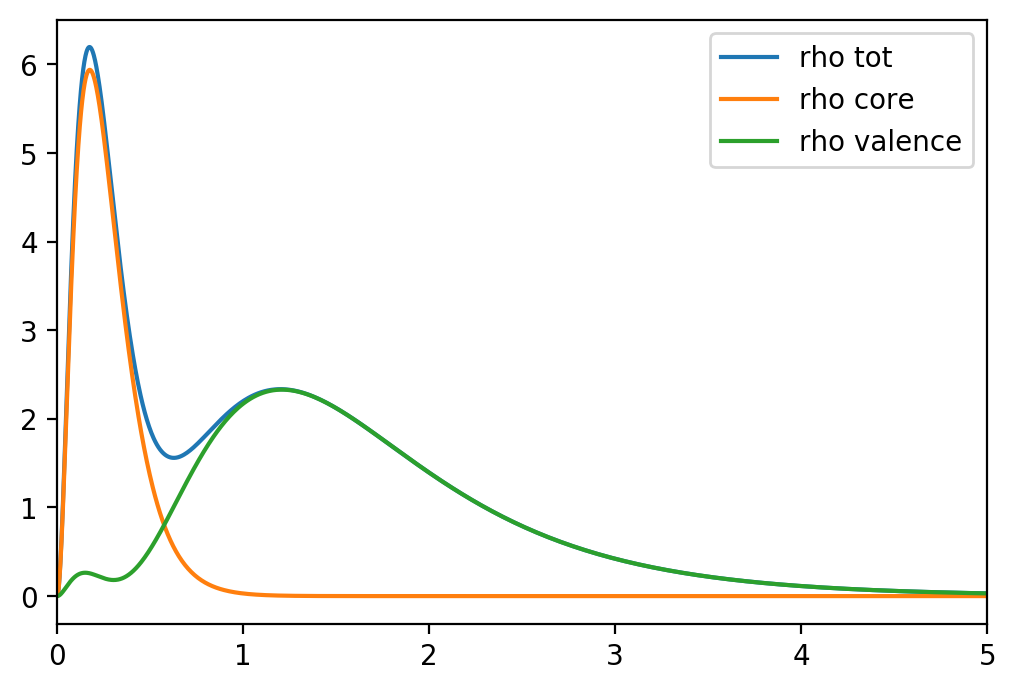

In [71]:
rhocore = 2*(ae.orbitals[0].ur**2) / (4*pi*r*r)
rhoval = 2*(ae.orbitals[1].ur**2 + ae.orbitals[2].ur**2) / (4*pi*r*r)
plt.figure(figsize=(6,4), dpi=200)
plt.plot(r, ae.n*r*r*4*pi, label='rho tot')
plt.plot(r, rhocore*r*r*4*pi, label='rho core')
plt.plot(r, rhoval*r*r*4*pi, label='rho valence')
plt.xlim(0,5)
plt.legend()
plt.show()

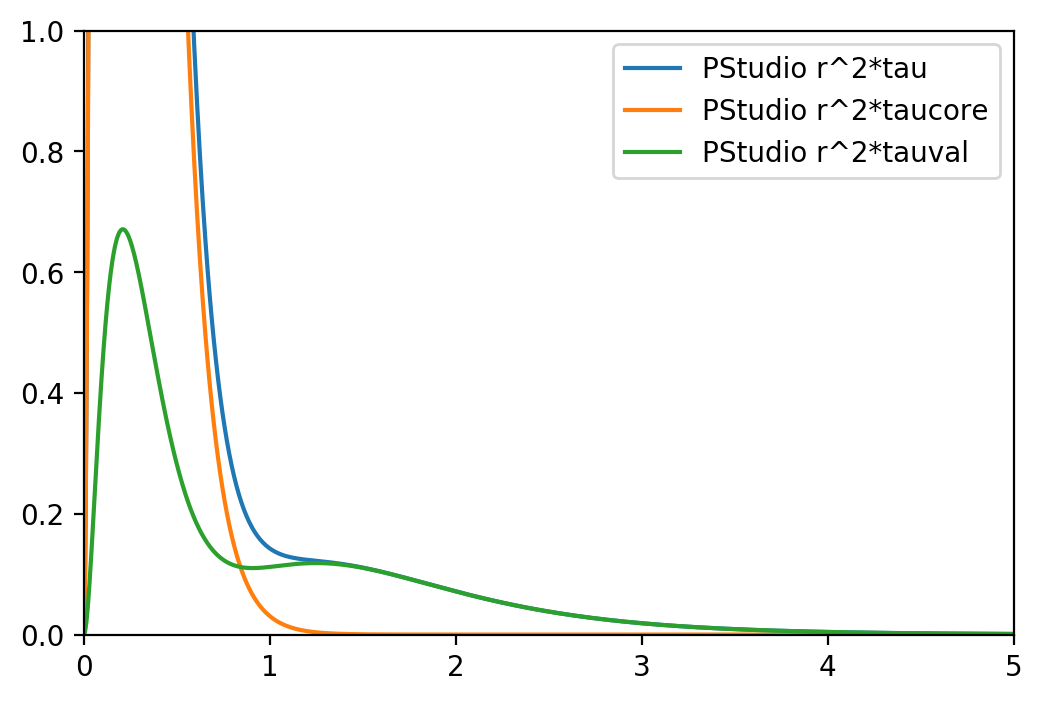

/home/ceresoli/Programs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/home/ceresoli/Programs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


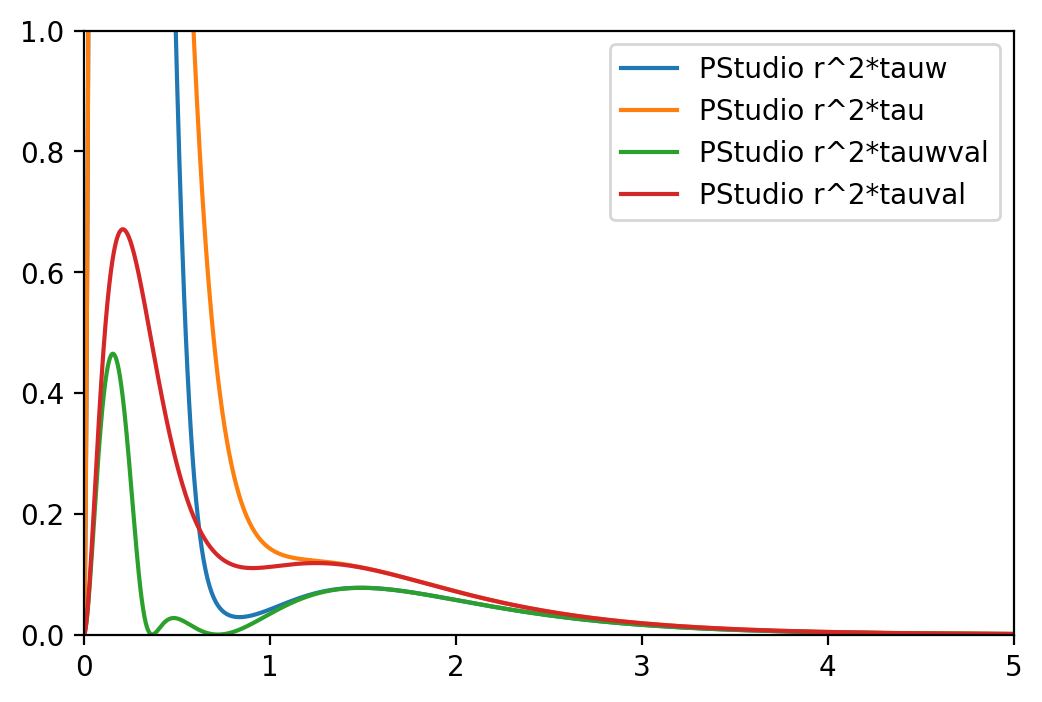

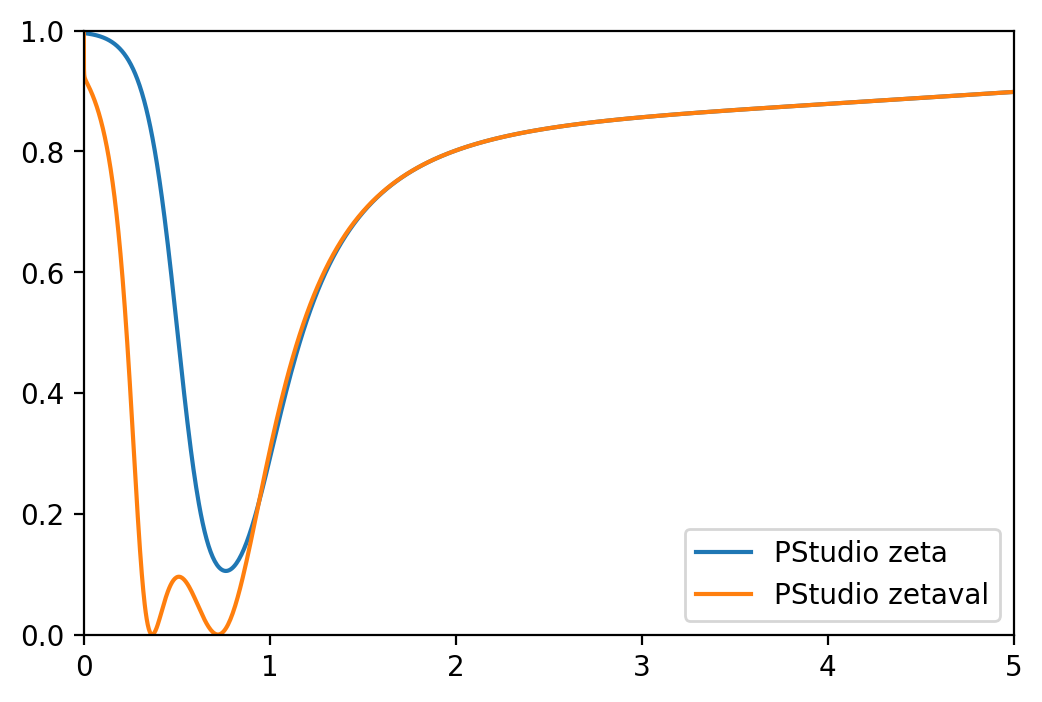

In [85]:
# zeta (must be <1)
ae.orbitals[0].f = 0
ae.calculate_tau()
tauval = ae.tau.copy()
ae.orbitals[0].f = 2
ae.calculate_tau()
taucore = ae.tau - tauval

plt.figure(figsize=(6,4), dpi=200)
plt.plot(r, ae.tau*r*r, label='PStudio r^2*tau')
plt.plot(r, taucore*r*r, label='PStudio r^2*taucore')
plt.plot(r, tauval*r*r, label='PStudio r^2*tauval')
plt.xlim(0,5)
plt.ylim(0,1)
plt.legend()
plt.show()

tauwval = (1.0/8.0) * ae.rgd.deriv1(rhoval)**2 / rhoval
plt.figure(figsize=(6,4), dpi=200)
plt.plot(r, tauw*r*r, label='PStudio r^2*tauw')
plt.plot(r, ae.tau*r*r, label='PStudio r^2*tau')
plt.plot(r, tauwval*r*r, label='PStudio r^2*tauwval')
plt.plot(r, tauval*r*r, label='PStudio r^2*tauval')
plt.xlim(0,5)
plt.ylim(0,1)
plt.legend()
plt.show()

zetaval = tauwval/tauval
plt.figure(figsize=(6,4), dpi=200)
plt.plot(r, zeta, label='PStudio zeta')
plt.plot(r, zetaval, label='PStudio zetaval')
plt.xlim(0,5)
plt.ylim(0,1)
plt.legend()
plt.show()